# Inspect BioProspector Results
The `predict promoter_signal.py` workflow generates 3 main output files after running BioProspector `N` times as well as `N` raw files (BioProspector's direct program output). This notebook demonstrates how to inspect the output files and understand and interpret their contents.

1. Raw BioProspector output file
1. BioPropsector Summary file
1. BioProspector Margin of Victory file
1. BioProspector best promoter selection file

In [15]:
import altair as alt
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
import warnings; warnings.simplefilter('ignore')

import bioprospector_utils as bu
from bioprospector_utils import BioProspectorResult,SeqMotifMatch_2B,Motif_2B
import consensus_viz_utils as cu

In [16]:
# indicate the bioprospector output files and 
# directories created during predict_promoter_signal.py

promoter_f =       'n3_outdir/loci_in_top_3perc_upstream_regions_w300_min20_trunc.fa'

biop_raw_dir =     'n3_outdir/loci_in_top_3perc_upstream_regions_w300_min20_trunc_W6_w6_G18_g15_d1_a1_n200_1598952202_BIOP_RAW'
biop_summary_f =   'n3_outdir/loci_in_top_3perc_upstream_regions_w300_min20_trunc_W6_w6_G18_g15_d1_a1_n200_1598952202_SUMMARY.tsv'
biop_mov_f =       'n3_outdir/loci_in_top_3perc_upstream_regions_w300_min20_trunc_W6_w6_G18_g15_d1_a1_n200_1598952202_TOP_3_MOV.tsv'
biop_selection_f = 'n3_outdir/loci_in_top_3perc_upstream_regions_w300_min20_trunc_W6_w6_G18_g15_d1_a1_n200_1598952202_SELECTION.fa'


# 1. Examine raw bioprospector output file
Each run of BioProspector produces a raw file, which is parsed during `predict_promoter_signal.py` to extract the information about the sequence matches to the motifs it finds. Looking at the raw .txt file is fairly human readable. This notebook section just shows some convenient functions for inspecting it via custom Python data structures.

In [17]:
# pick one of the raw BioProspector files from the raw folder
biop_raw_f = os.path.join(biop_raw_dir, 'biop_run1.txt')

# load it into a BioProspectorResult object
biop_result = BioProspectorResult(biop_raw_f,promoter_f)

This BioProspector Result file reports:
* 5 found motifs


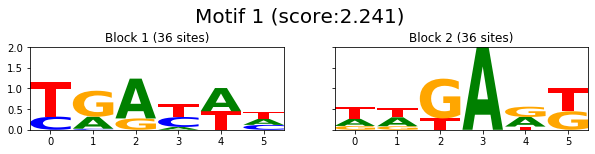

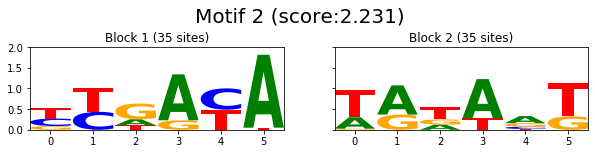

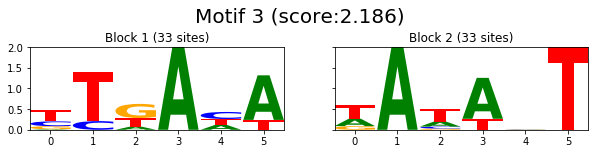

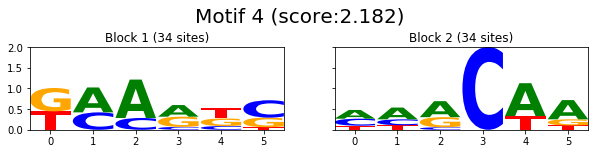

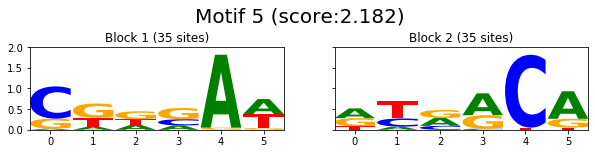

In [18]:
print("This BioProspector Result file reports:")
print(f"* {len(biop_result.motifs)} found motifs")

# view motif logos
biop_result.view_motifs()

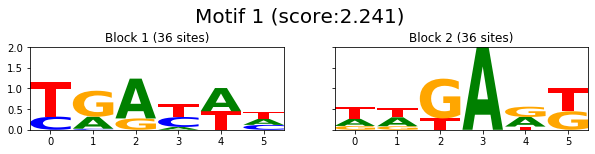

Motif 1
Block 1: TGATAT (ATATCA)
Block 2: TAGAGT (ACTCTA)
Score: 2.241, Sites: 36

Number of Seq Matches: 36


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 1 match instance #1
Length: 300, Block 1: 76, Block 2: 98
CGATAA -- (16) -- TGGAAG
[ 219 ] -- ---- -- [ 197 ]


Seq: EQU24_RS02970|pqqA|pyrroloquinoline quinone precursor peptide PqqA
Motif 1 match instance #1
Length: 300, Block 1: 267, Block 2: 288
TAACAC -- (15) -- TGGAGG
[ 28 ] -- ---- -- [ 7 ]


Seq: EQU24_RS21720||hypothetical protein
Motif 1 match instance #1
Length: 286, Block 1: 118, Block 2: 139
TAACTT -- (15) -- ATGAGG
[ 163 ] -- ---- -- [ 142 ]


Seq: EQU24_RS15100||HU family DNA-binding protein
Motif 1 match instance #1
Length: 182, Block 1: 29, Block 2: 53
TGAAAC -- (18) -- TAGAGT
[ 148 ] -- ---- -- [ 124 ]


Seq: EQU24_RS12525|ssrA|transfer-messenger RNA
Motif 1 match instance #1
Length: 160, Block 1: 106, Block 2: 129
TAATAA -- (17) -- ATGAAT
[ 49 ] -- ---- -- [ 26 ]


Seq: EQU24

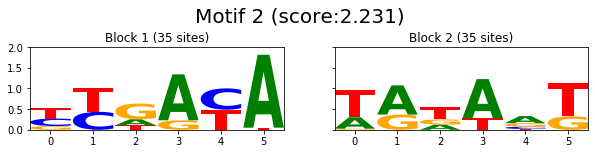

Motif 2
Block 1: TTGACA (TGTCAA)
Block 2: TATAAT (ATTATA)
Score: 2.231, Sites: 35

Number of Seq Matches: 35


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 2 match instance #1
Length: 300, Block 1: 171, Block 2: 193
TTGACA -- (16) -- TAAACT
[ 124 ] -- ---- -- [ 102 ]


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 2 match instance #2
Length: 300, Block 1: 75, Block 2: 98
CCGATA -- (17) -- TGGAAG
[ 220 ] -- ---- -- [ 197 ]


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 2 match instance #3
Length: 300, Block 1: 14, Block 2: 35
TTGGCA -- (15) -- TGGAAT
[ 281 ] -- ---- -- [ 260 ]


Seq: EQU24_RS02970|pqqA|pyrroloquinoline quinone precursor peptide PqqA
Motif 2 match instance #1
Length: 300, Block 1: 17, Block 2: 38
CTTATA -- (15) -- AATTCG
[ 278 ] -- ---- -- [ 257 ]


Seq: EQU24_RS21720||hypothetical protein
Motif 2 match instance #1
Length: 286, Block 1: 250, Block 2: 272
TC

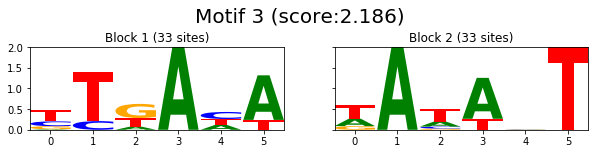

Motif 3
Block 1: TTGACA (TGTCAA)
Block 2: TATATT (AATATA)
Score: 2.186, Sites: 33

Number of Seq Matches: 33


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 3 match instance #1
Length: 300, Block 1: 171, Block 2: 193
TTGACA -- (16) -- TAAACT
[ 124 ] -- ---- -- [ 102 ]


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 3 match instance #2
Length: 300, Block 1: 139, Block 2: 162
TTAATA -- (17) -- TAAATT
[ 156 ] -- ---- -- [ 133 ]


Seq: EQU24_RS02970|pqqA|pyrroloquinoline quinone precursor peptide PqqA
Motif 3 match instance #1
Length: 300, Block 1: 247, Block 2: 268
CTTACT -- (15) -- AACACT
[ 48 ] -- ---- -- [ 27 ]


Seq: EQU24_RS21720||hypothetical protein
Motif 3 match instance #1
Length: 286, Block 1: 163, Block 2: 184
CTTACA -- (15) -- AATTTT
[ 118 ] -- ---- -- [ 97 ]


Seq: EQU24_RS15100||HU family DNA-binding protein
Motif 3 match instance #1
Length: 182, Block 1: 16, Block 2: 40
GTTAAA -- (18) -- AATACT
[ 16

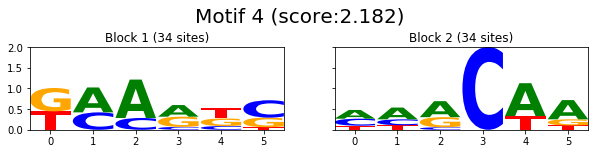

Motif 4
Block 1: GAAATC (GATTTC)
Block 2: AAACAA (TTGTTT)
Score: 2.182, Sites: 34

Number of Seq Matches: 34


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 4 match instance #1
Length: 300, Block 1: 31, Block 2: 55
GAAATG -- (18) -- AAACAG
[ 264 ] -- ---- -- [ 240 ]


Seq: EQU24_RS02970|pqqA|pyrroloquinoline quinone precursor peptide PqqA
Motif 4 match instance #1
Length: 300, Block 1: 256, Block 2: 277
TCAAGC -- (15) -- AAACAT
[ 39 ] -- ---- -- [ 18 ]


Seq: EQU24_RS21720||hypothetical protein
Motif 4 match instance #1
Length: 286, Block 1: 77, Block 2: 100
TACATC -- (17) -- TCACAA
[ 204 ] -- ---- -- [ 181 ]


Seq: EQU24_RS21720||hypothetical protein
Motif 4 match instance #2
Length: 286, Block 1: 28, Block 2: 51
GAAGGT -- (17) -- CACCAA
[ 253 ] -- ---- -- [ 230 ]


Seq: EQU24_RS15100||HU family DNA-binding protein
Motif 4 match instance #1
Length: 182, Block 1: 135, Block 2: 156
TAAGCG -- (15) -- TAACTT
[ 42 ] -- ---- -- [ 21 ]


Seq: EQU24_RS125

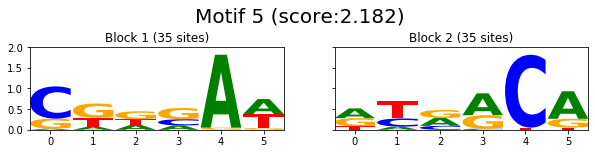

Motif 5
Block 1: CGGGAA (TTCCCG)
Block 2: ATAACA (TGTTAT)
Score: 2.182, Sites: 35

Number of Seq Matches: 35


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 5 match instance #1
Length: 300, Block 1: 150, Block 2: 171
CTAGAT -- (15) -- TTGACA
[ 145 ] -- ---- -- [ 124 ]


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 5 match instance #2
Length: 300, Block 1: 120, Block 2: 142
GTGGAT -- (16) -- ATAGCG
[ 175 ] -- ---- -- [ 153 ]


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 5 match instance #3
Length: 300, Block 1: 30, Block 2: 54
CGAAAT -- (18) -- AAAACA
[ 265 ] -- ---- -- [ 241 ]


Seq: EQU24_RS02970|pqqA|pyrroloquinoline quinone precursor peptide PqqA
Motif 5 match instance #1
Length: 300, Block 1: 70, Block 2: 94
CGTGAA -- (18) -- ATGCCG
[ 225 ] -- ---- -- [ 201 ]


Seq: EQU24_RS21720||hypothetical protein
Motif 5 match instance #1
Length: 286, Block 1: 76, Block 2: 99
CT

In [19]:
# View further details of the consensus and location of 
# where this motif was identified in each of the input sequences
for m in biop_result.motifs:
    m.view_motif()
    m.pprint()

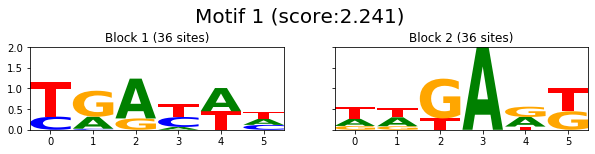

alt.VConcatChart(...)

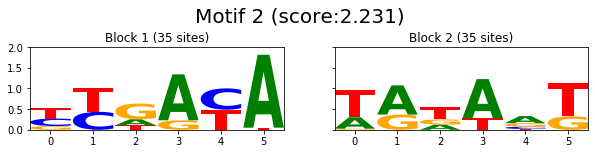

alt.VConcatChart(...)

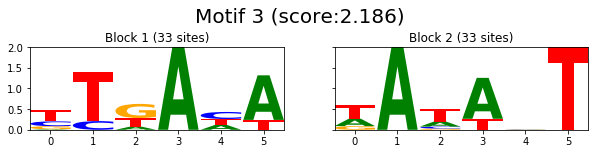

alt.VConcatChart(...)

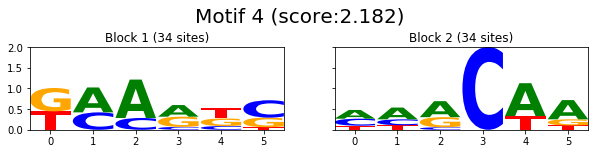

alt.VConcatChart(...)

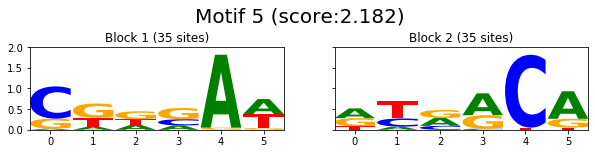

alt.VConcatChart(...)

In [20]:
# Same information but an Altair Visualization of the motif locations along each input sequence
biop_result.view_motifs_and_locs()

In [21]:
# You can also dig into the specific objects storing the 
# motif match to a particular sequence
m1 = biop_result.motifs[1]
for sm in m1.seq_matches:
    sm.pprint()


Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 2 match instance #1
Length: 300, Block 1: 171, Block 2: 193
TTGACA -- (16) -- TAAACT
[ 124 ] -- ---- -- [ 102 ]

Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 2 match instance #2
Length: 300, Block 1: 75, Block 2: 98
CCGATA -- (17) -- TGGAAG
[ 220 ] -- ---- -- [ 197 ]

Seq: EQU24_RS19315|pmoC|methane monooxygenase/ammonia monooxygenase subunit C
Motif 2 match instance #3
Length: 300, Block 1: 14, Block 2: 35
TTGGCA -- (15) -- TGGAAT
[ 281 ] -- ---- -- [ 260 ]

Seq: EQU24_RS02970|pqqA|pyrroloquinoline quinone precursor peptide PqqA
Motif 2 match instance #1
Length: 300, Block 1: 17, Block 2: 38
CTTATA -- (15) -- AATTCG
[ 278 ] -- ---- -- [ 257 ]

Seq: EQU24_RS21720||hypothetical protein
Motif 2 match instance #1
Length: 286, Block 1: 250, Block 2: 272
TCAACA -- (16) -- AGTAGG
[ 31 ] -- ---- -- [ 9 ]

Seq: EQU24_RS21720||hypothetical protein
Motif 2 match instance #2

# 2. BioProspector Summary File
Section 1 shows what a single raw BioProspector file looks like. Usually, `predict_promoter_signal.py` will produce around 200 of these files. The SUMMARY.tsv uses the motif matches in all the raw files as "votes" for promoter candidates. The more frequently the exact same region of a sequence is identified as matching a BioProspector motif, the more "votes" it gets. This summary file counts the total number of votes received by all motif matches, grouped by the input sequence. Therefore, the top voted match region for each input sequence is our ultimate prediction for the probable promoter (-35 and -10 hexamers).

For some sequences, the voting result is very clear: there is 1 region of the sequence that gets called out way more often than any other subsequence. However, sometimes there are a couple sequence regions that may be very similar or for whatever reason, BioProspector identifies them both fairly frequently. For these, the number of votes may be much tighter between competing promoter candidates. This indicates that BioProspector was less confident about which region of the input carried the main promoter signal. We can visualize the vote distrubtion to get a sense on which inputs had more or less confident promoter calls. 

In [22]:
# load the summary file
summ_df = pd.read_csv(biop_summary_f,sep='\t')
summ_df.head()

seq_name  block_count  \
0  EQU24_RS02895||exosortase system-associated pr...          209   
1  EQU24_RS02895||exosortase system-associated pr...          147   
2  EQU24_RS02895||exosortase system-associated pr...           78   
3  EQU24_RS02895||exosortase system-associated pr...           64   
4  EQU24_RS02895||exosortase system-associated pr...           61   

                       seq_block  \
0  TTGACAACATTCAACCTTTAGGCTATTGT   
1  GTTATAGCAACTTAAATGATTGTTATAGT   
2   CCGATACATGTAGGGGGAATTGTTTGAT   
3   TTGACAACATTCAACCTTTAGGCTATTG   
4    GTGAAAACTCTTTGGGTCGGAGTTATA   

                                      block_summ  \
0    [29]TTGACA -- (17) -- [52]TATTGT[end-->243]   
1   [236]GTTATA -- (17) -- [259]TATAGT[end-->36]   
2  [119]CCGATA -- (16) -- [141]TTTGAT[end-->154]   
3    [29]TTGACA -- (16) -- [51]CTATTG[end-->244]   
4   [215]GTGAAA -- (15) -- [236]GTTATA[end-->59]   

                                          agreements  
0  ['n3_outdir/loci_in_top_3perc_upstream_regions...  
1  ['n3_outdir/loci_in_top_3perc_upstream_regions...  
2  ['n3_outdir/loci_in_top_3perc_upstream_regions...  
3  ['n3_outdir/loci_in_top_3perc_upstream_regions...  
4  ['n3_outdir/loci_in_top_3perc_upstream_regions...

In [23]:
def get_rank_color(rank):
    '''
    Custom colors to mark the first, second, and third ranked promoter predictions
    '''
    if int(rank) == 1:
        return sns.xkcd_rgb['bright blue']
    elif int(rank) == 2:
        return sns.xkcd_rgb['bright pink']
    elif int(rank)== 3: 
        return sns.xkcd_rgb['apple green']
    else:
        return "gray"
    
def vote_summary_plot(df):
    '''
    Given a BioProspector summary file as a dataframe, plot the vote counts.
    Highlight the top 3 ranked promoters for each input sequence as a way to
    convey which votes were close vs clear.
    '''
    fig, axes = plt.subplots(nrows=20, ncols=4, sharex=True, sharey=True, figsize=(15,70))
    axes_list = [item for sublist in axes for item in sublist] 

    for seq_name, sub_df in df.groupby("seq_name"):
        # calculate the rank of each match by vote count
        sub_df['rank'] = sub_df['block_count'].rank(ascending=False)
        color_pal = [get_rank_color(x) for x in sub_df['rank'].values]

        # make the bar chart on the next axis
        ax = axes_list.pop(0)
        sns.barplot(data=sub_df,x='block_summ',y='block_count',palette=color_pal,ax=ax)

        # draw horizontal lines for the top 3 ranks
        count_order = sorted(sub_df['block_count'].values,reverse=True)
        first_line_h = count_order[0]
        second_line_h = count_order[1]
        third_line_h = count_order[2]

        ax.axhline(first_line_h,color=sns.xkcd_rgb['bright blue'])
        ax.axhline(second_line_h,color=sns.xkcd_rgb['bright pink'])
        ax.axhline(third_line_h,color=sns.xkcd_rgb['green apple'])

        # axis and title configs
        ax.set_title('\n'.join(wrap(seq_name,30)))#.split('|')[0])
        ax.set_xticks([]) 
        ax.set_xlabel("BioP predicted promoters")
        ax.set_ylabel("BioP votes")

    # Now use the matplotlib .remove() method to 
    # delete anything we didn't use
    for ax in axes_list:
        ax.remove()

    fig.tight_layout()

In [24]:
# filter out predictions with fewer than 5 votes
summ_df_filt = summ_df[summ_df['block_count'] > 5]

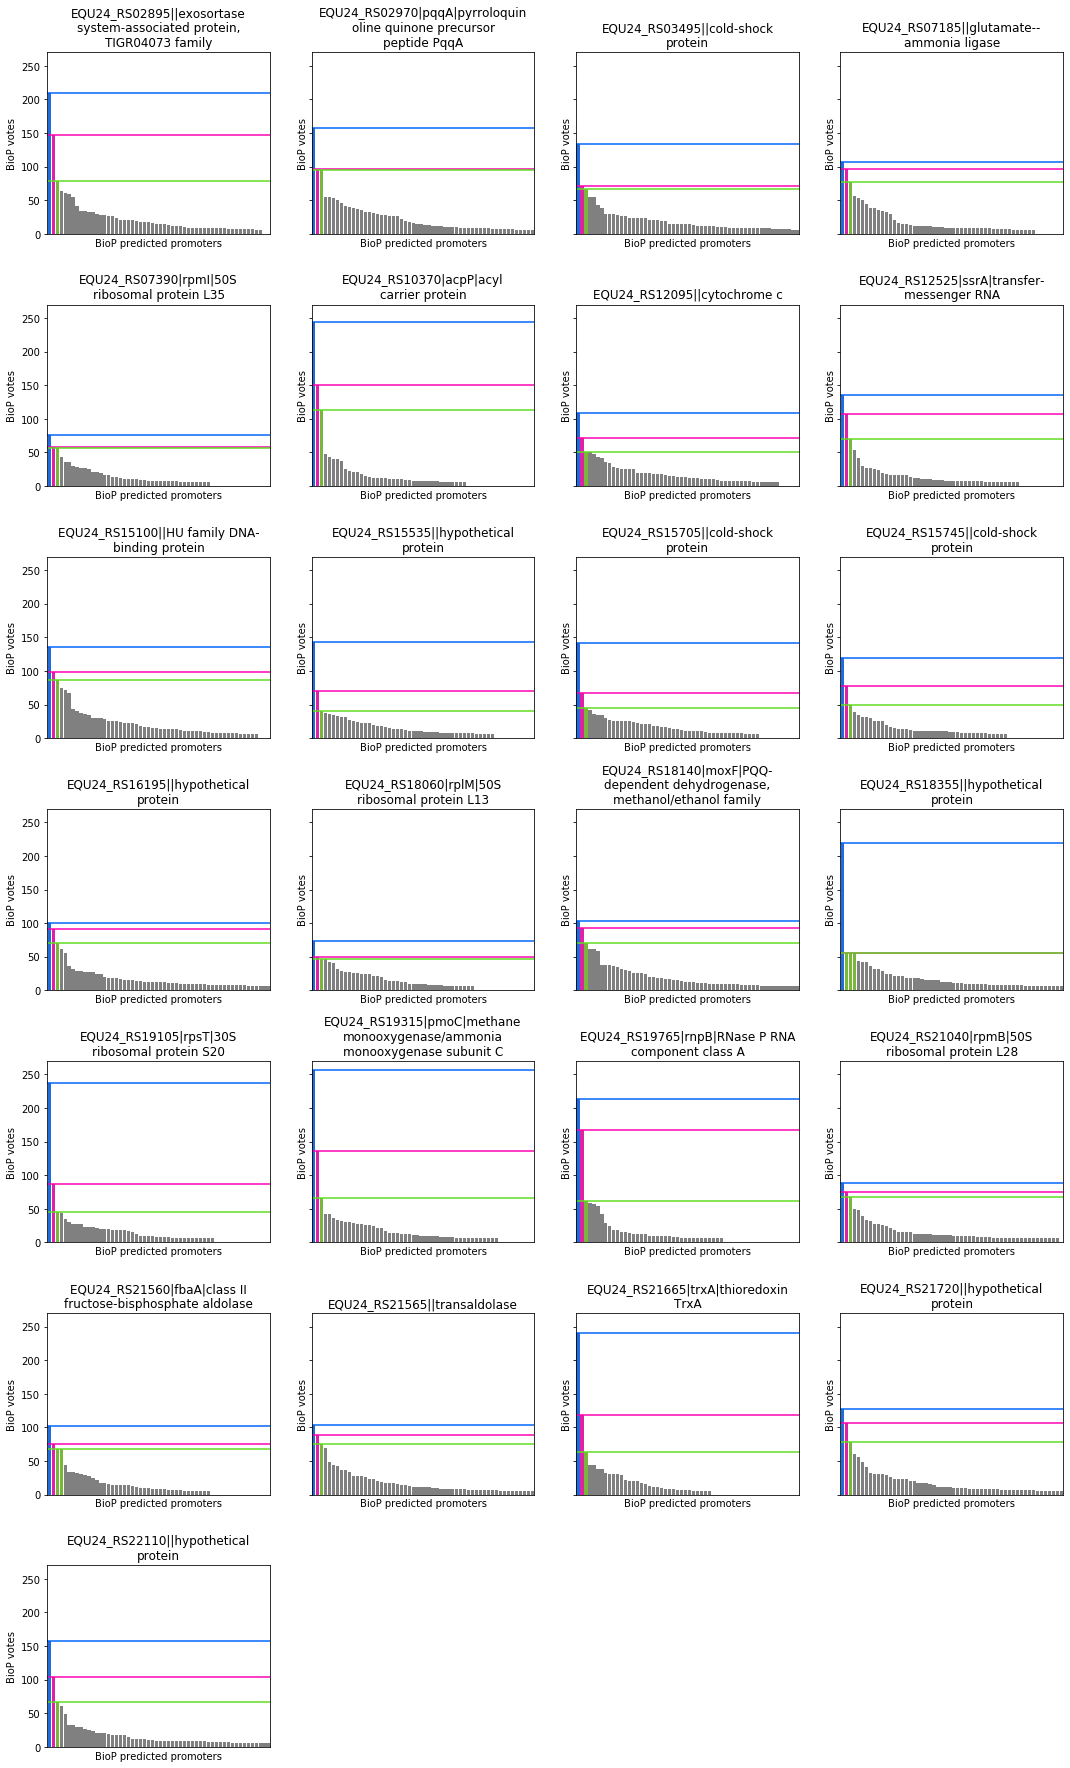

In [25]:
vote_summary_plot(summ_df_filt)

Each bar is a different predicted promoter identified and voted on by motif matches found in BioProspector. Votes are tabulated on the y-axis and promoters are ordered on the x-axis by their votes. The top 3 voted promoters have colored lines (First place = Blue, Second place = Pink, Third place = Green). This small multiples plot helps to give a quick sense of which input sequences contained a very clear winner (blue lines with a lot of separation between itself and the second place pink line indicated a sequence where a primary promoter region was found by BioProspector many times over) vs where the race was tighter (where blue and pink and sometimes green lines are quite close represent a sequence where there were multiple regions BioProspector identified as being likely promoters and it had trouble choosing between them).

The final SELECTION.fa file always reports the top voted promoter prediction, however inspecting these plots may reveal tight races where a user would like to manually inspect the second/third place predictions.

To manually inspect these results, the user can consult the TOP_K_MOV.tsv file. By default, the top 3 predictions are reported however `predict_promoter_signal.py` can be passed an argument to output more or less than 3.  

# 3. Inspect Top K Margin of Victory file
The TOP_K_MOV.tsv file is a shorter version of the SUMMARY.tsv (which reports every prediction which received even 1 vote). The TOP_K_MOV.tsv is just the Top K predictions (3 by default). The primary purpose of this file is to be more convenient for a human to inspect (and not have to scroll through tons of poor predictions) however the important data in this file are reflected in the colored horizontal lines in the plots in Section 2 above, so additional visualizations are not included in this section. The other small difference in the TOP_K_MOV.tsv (besides having many fewer predictions) is that it also reports the "Margin of Victory", which is the difference in votes between the first place prediction and second place prediction (or difference between second place and third place, current place and next place, etc). Small margins of victory indicate a less stable voting outcome whereas large margins of victories are a more robust ordering of promoter predictions. 

In [26]:
mov_df = pd.read_csv(biop_mov_f,sep='\t')
mov_df

loc  \
0   EQU24_RS02895||exosortase system-associated pr...   
1   EQU24_RS02895||exosortase system-associated pr...   
2   EQU24_RS02895||exosortase system-associated pr...   
3   EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...   
4   EQU24_RS02970|pqqA|pyrroloquinoline quinone pr...   
..                                                ...   
70                EQU24_RS21720||hypothetical protein   
71                EQU24_RS21720||hypothetical protein   
72                EQU24_RS22110||hypothetical protein   
73                EQU24_RS22110||hypothetical protein   
74                EQU24_RS22110||hypothetical protein   

                          sequence  margin_of_victory  \
0    TTGACAACATTCAACCTTTAGGCTATTGT                 62   
1    GTTATAGCAACTTAAATGATTGTTATAGT                 69   
2     CCGATACATGTAGGGGGAATTGTTTGAT                 14   
3    TTGCTTTGCCTAAATTATCGTCGTATACT                 62   
4      TTGTCGCGACTTATACCCCTCTTAGAT                  1   
..                             ...                ...   
70  TTGTCACAATTCCCTAACTTTTAACTTGCT                 27   
71   TTGTAAGCATAGGCTTACACCGGTAAGCT                 18   
72    TTGATATTGCGGCAATCTACGTTAGAAT                 54   
73  CCTACAAATATACTTGGTTGAATTTATAAG                 38   
74   CTGAATAATAGTTACTATGACAACATGAG                  5   

                                       motif_summ  raw_votes  
0     [29]TTGACA -- (17) -- [52]TATTGT[end-->243]        209  
1    [236]GTTATA -- (17) -- [259]TATAGT[end-->36]        147  
2   [119]CCGATA -- (16) -- [141]TTTGAT[end-->154]         78  
3    [208]TTGCTT -- (17) -- [231]TATACT[end-->64]        158  
4      [8]TTGTCG -- (15) -- [29]TTAGAT[end-->266]         96  
..                                            ...        ...  
70   [97]TTGTCA -- (18) -- [121]CTTGCT[end-->160]        106  
71  [150]TTGTAA -- (17) -- [173]TAAGCT[end-->108]         79  
72    [92]TTGATA -- (16) -- [114]TAGAAT[end-->86]        158  
73    [42]CCTACA -- (18) -- [66]TATAAG[end-->134]        104  
74   [166]CTGAAT -- (17) -- [189]CATGAG[end-->11]         66  

[75 rows x 5 columns]

# 4. Inspect BioProspector best promoter Selection file
The highest voted prediction for each input sequence is collected in a fasta file (SELECTION.fa). Users may decide they prefer the 2nd or 3rd place prediction after viewing the above charts and inspecting the MOV.tsv or SUMMARY.tsv files. In that case, a user can simply replace the sequence in SELECTION.fa with the sequence from their preferred prediction.

This fasta file contains the exact region of the input sequence corresponding to BioProspector's top promoter prediction (a -35 hexamer, followed by a spacer 15-18 bp, followed by a -10 hexamer). Therefore, the first 6 bases and the last 6 bases of each sequence are the hexamer calls.

The most basic visualization from the SELECTION.fa file is to create a consensus motif from all the predicted promoters.

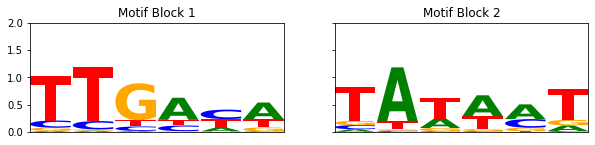

In [27]:
motif_blocks, m1, m2 = cu.build_2Bmotif_from_selection_file(biop_selection_f)

In [28]:
print(f"Block 1 Consensus: {m1.consensus}")
print(f"Block 1 Anti-Consensus: {m1.anticonsensus}")
print(f"Block 2 Consensus: {m2.consensus}")
print(f"Block 2 Anti-Consensus: {m2.anticonsensus}")

Block 1 Consensus: TTGACA
Block 1 Anti-Consensus: AAAGGC
Block 2 Consensus: TATAAT
Block 2 Anti-Consensus: ACCCTC
